Основные цели этого задания:
*   Научиться работать с документацией scikit-learn
*   Научиться готовить данные к обучению модели и к ее валидации
*   Научиться оценивать качество модели и выбирать лучшую модель, опираясь на метрики

**Задачи:**

In [64]:
import pandas as pd
from sklearn.datasets import load_diabetes

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import tree

import sklearn.metrics
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

*1. В документации библиотеки scikit learn найдите, как загрузить датасет для построения модели прогноза прогрессирования заболевания через год после исходного уровня.*

In [46]:
df = load_diabetes()
type(df)

sklearn.utils._bunch.Bunch

In [47]:
df2 = pd.read_csv('https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt', sep='\t')
df2.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


Можем также посмотреть оригинальную таблицу по другой ссылке

In [48]:
df.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [49]:
list(df.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

*2. Выведите содержимое поля DESCR, которое вернет функция, загружающая датасет, чтобы изучить содержимое датасета*

In [50]:
print(df.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

Информация об атрибутах:
*   возраст возраст в годах
*   секс (пол)
*   индекс массы тела bmi
*   среднее артериальное давление bp
*   s1 tc, общий холестерин сыворотки
*   s2 ldl, липопротеины низкой плотности
*   s3 hdl, липопротеины высокой плотности
*   s4 tch, общий холестерин / ЛПВП
*   s5 ltg, возможно логарифм уровня триглицеридов в сыворотке
*   s6 glu, уровень сахара в крови

*3. Подготовьте данные к обучению моделей: отделите целевой признак от датасета, разделите датасет на тренировочную и валидационную части*

In [51]:
diabetes_df = load_diabetes(as_frame=True).frame
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [52]:
features = diabetes_df.drop(['target'], axis=1)
target = diabetes_df['target']

print(features.shape)
print(target.shape)

(442, 10)
(442,)


In [53]:
features_train, features_val, target_train, target_val = train_test_split(features, target, test_size=0.3, random_state=45)

Попробуем выборку разделить на 5 условных частей и создать новый столбец:

In [54]:
diabetes_df['target'].value_counts(bins=5).sort_index(ascending=True)

target
(24.677999999999997, 89.2]    118
(89.2, 153.4]                 130
(153.4, 217.6]                 91
(217.6, 281.8]                 80
(281.8, 346.0]                 23
Name: count, dtype: int64

In [55]:
def target_transform(row):
    if row <= 89.2:
        return 0
    elif row > 89.2 and row <= 153.4:
        return 1
    elif row > 153.4 and row <= 217.6:
        return 2
    elif row > 217.6 and row <= 281.8:
        return 3
    elif row > 281.8:
        return 4

    else:
        return 'unknown'

In [56]:
diabetes_df2 = diabetes_df.copy()
diabetes_df2['target_g'] = diabetes_df2['target'].apply(target_transform)


diabetes_df2

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,target_g
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,1
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,1
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,2
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0,2
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0,1
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0,1
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0,3


*4. Обучите решающее дерево и оцените адекватность обученной модели. Для этого достаточно сравнить метрики качества с метриками, получаемыми от простой модели. Например, если бы мы подавали на вход среднее значение целевой переменной на обучающей части выборки*

In [57]:
model_tree1 = tree.DecisionTreeClassifier()
model_tree1.fit(features, target)

print(model_tree1)

DecisionTreeClassifier()


In [ ]:
for t in diabetes_df['target'].unique():
    print(f'==Class {t}==')
    display(diabetes_df.query(f'target == {t}').describe().loc[['min', 'mean', 'max'], :])

вывод цикла убрала, так как занимает слишком много места

In [60]:
# взяли средние значения признаков для каждого из трех классов
new_features = pd.DataFrame(
    [[-0.045472, -0.044642, -0.07303, -0.081413, 0.08374, 0.027809, 0.173816, -0.039493, -0.004222, 0.003064], # Class 57.0
     [0.038076, 0.05068, 0.016428, 0.021872, 0.03971, 0.045032, -0.043401, 0.07121, 0.04977, 0.015491], # Class 212.0
     [0.030811, 0.05068, -0.034229, 0.043666, 0.057597, 0.068831, -0.032356, 0.057557, 0.035459, 0.085907]], # Class 120.0
    columns=features.columns)

answers = model_tree1.predict(new_features) 
print(answers)

[ 57. 212. 120.]


Классы предсказаны верно, но модель знала все данные заранее, т.е. мы проверяем не на тестовой выборке, а на обучающей

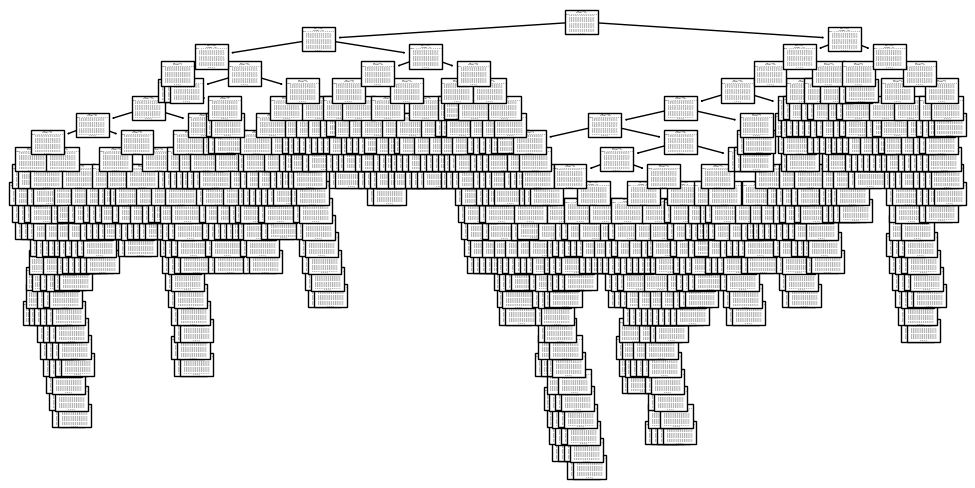

In [61]:
plt.figure(figsize=[12, 6])
tree.plot_tree(model_tree1, feature_names=features.columns);

дерево нечитаемо, классов слишком много

Обучаем модель на тренировочной выборке, проверяем на тестовой

In [62]:
model_tree2 = tree.DecisionTreeClassifier()
model_tree2.fit(features_train, target_train)
predictions_val = model_tree2.predict(features_val)

def count_errors(true_answers, pred_answers):
    all_answers_together = zip(true_answers, pred_answers)
    errors_list = [1 if v[0] != v[1] else 0 for v in all_answers_together]
    return sum(errors_list)

print("Ошибок:", count_errors(target_val, predictions_val))

Ошибок: 132


In [65]:
print("Accuracy test built-in:", accuracy_score(target_val, predictions_val))

predictions_train = model_tree2.predict(features_train)
print("Accuracy train built-in:", accuracy_score(target_train, predictions_train))

Accuracy test built-in: 0.007518796992481203
Accuracy train built-in: 1.0


Попробуем обучить модель на данных, которые мы разделили по группам

In [67]:
features2 = diabetes_df2.drop(['target', 'target_g'], axis=1)
target2 = diabetes_df2['target_g']

print(features2.shape)
print(target2.shape)

(442, 10)
(442,)


In [68]:
features2_train, features2_val, target2_train, target2_val = train_test_split(features2, target2, test_size=0.3, random_state=45)

In [70]:
model_tree3 = tree.DecisionTreeClassifier()
model_tree3.fit(features2_train, target2_train)
predictions2_val = model_tree3.predict(features2_val)

def count_errors(true_answers, pred_answers):
    all_answers_together = zip(true_answers, pred_answers)
    errors_list = [1 if v[0] != v[1] else 0 for v in all_answers_together]
    return sum(errors_list)

print("Ошибок:", count_errors(target2_val, predictions2_val))

Ошибок: 87


Ошибок стало меньше, чем было. Мы немного повысили точность модели.

*5. Обучите линейную регрессию и оцените ее адекватность*

In [11]:
log_regmodel = LogisticRegression()
log_regmodel.fit(features_train, target_train)

LogisticRegression()

In [12]:
l_predictions = log_regmodel.predict(features_val)

In [13]:
log_regmodel.score(features_train, target_train)

0.05177993527508091

In [14]:
log_regmodel.score(features_val, target_val)

0.0

In [72]:
def count_errors(true_answers, pred_answers):
    all_answers_together = zip(true_answers, pred_answers)
    errors_list = [1 if v[0] != v[1] else 0 for v in all_answers_together]
    return sum(errors_list)

print("Ошибок:", count_errors(target_val, l_predictions))

Ошибок: 133


Точность модели 0, а это значит что она не предсказала ни один параметр. Попробуем обучить модель на данных, которые мы разделили по группам

In [24]:
features2 = diabetes_df2.drop(['target', 'target_g'], axis=1)
target2 = diabetes_df2['target_g']

print(features2.shape)
print(target2.shape)

(442, 10)
(442,)


In [25]:
features2_train, features2_val, target2_train, target2_val = train_test_split(features2, target2, test_size=0.3, random_state=45)

In [26]:
log_regmodel2 = LogisticRegression()
log_regmodel2.fit(features2_train, target2_train)

LogisticRegression()

In [39]:
l_predictions2 = log_regmodel2.predict(features2_val)

In [28]:
log_regmodel2.score(features2_train, target2_train)

0.4336569579288026

In [29]:
log_regmodel2.score(features2_val, target2_val)

0.3383458646616541

In [71]:
def count_errors(true_answers, pred_answers):
    all_answers_together = zip(true_answers, pred_answers)
    errors_list = [1 if v[0] != v[1] else 0 for v in all_answers_together]
    return sum(errors_list)

print("Ошибок:", count_errors(target2_val, l_predictions2))

Ошибок: 88


Эта модель отработала лучше предыдущей, так как мы немного повысили точность предсказания, но все равно она осталась на довольно низкой планке

*6. Выберите лучшую модель и обоснуйте свой выбор*

Подведем итоги:
*   Модель решающее дерево на выборке без изменений совершила 132 ошибки, а модель логистической регрессии - 133
*   Модель решающее деревона данных, которые мы разделили по группам совершила 87 ошибок, а модель логистической регрессии 88 ошибок

На мой взгляд, лучшей иши худшей модели нет, они отработали практически одинаково. Однако после обработки данных мы немного повысили точность моделей, возможно если бы мы оставили не 5 групп, а 3 - точность стала бы выше, но тогда могли "пострадать" конечные ответы, так как в них целое число, а не группа чисел.